In [1]:
import sys
import glob
from pathlib import Path

config_path = Path('../../Sign-Language-Translator-(DL)')
sys.path.append(str(config_path))

In [3]:
from config import TRAINING_PATH, TEST_PATH, DATASET_PATH
from Src import \
    show_train_files_path_info, \
    show_test_files_path_info, \
    convert_path_to_img_tf_data_test, \
    convert_path_to_img_tf_data_train, \
    one_hot_encode, \
    augment_image, \
    get_nan_in_data

import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np
import os

In [4]:
images_path_tf_data_train = tf.data.Dataset.list_files(TRAINING_PATH, shuffle=False)
images_path_tf_data_test = tf.data.Dataset.list_files(TEST_PATH, shuffle=False)

In [5]:
classes_path=tf.data.Dataset.list_files(DATASET_PATH + '/Train/*', shuffle=False)
classes_list=[]
for class_path in classes_path:
    split_class_path = tf.strings.split(class_path, os.path.sep)
    label = split_class_path[-1].numpy().decode('UTF-8')
    classes_list.append(label)

In [6]:
class_paths = glob.glob(os.path.join(DATASET_PATH, 'Train', '*'))

# Mengambil nama folder sebagai kelas
NUM_CLASSES = [os.path.basename(label) for label in class_paths]
NUM_CLASSES.sort()

print(NUM_CLASSES == classes_list)

True


In [7]:
print(f'data train: {images_path_tf_data_train}')
print(f'data test: {images_path_tf_data_test}')

data train: <_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
data test: <_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>


In [8]:
print(f'number of data train: {images_path_tf_data_train.cardinality()}')
print(f'number of data test: {images_path_tf_data_test.cardinality()}')

number of data train: 5200
number of data test: 390


In [10]:
show_train_files_path_info(images_path_tf_data_train, kind_data='Train', is_random=True, unit_file_size='KB')

======================== PATH INFO =========================
File Path: b'c:\\Workspace\\Python\\Machine-Learning\\Projects\\Classification-Tasks\\Sign-Language-Translator-(DL)\\Assets\\Datasets\\SIBI dataset\\Train\\K\\image_K_(1723070324.9531696).jpg'

===================== SPLIT FILE PATH ======================
Split File Path: [b'c:' b'Workspace' b'Python' b'Machine-Learning' b'Projects'
 b'Classification-Tasks' b'Sign-Language-Translator-(DL)' b'Assets'
 b'Datasets' b'SIBI dataset' b'Train' b'K'
 b'image_K_(1723070324.9531696).jpg']

======================= INDEXED PATH =======================
Index -> 0: b'c:'
Index -> 1: b'Workspace'
Index -> 2: b'Python'
Index -> 3: b'Machine-Learning'
Index -> 4: b'Projects'
Index -> 5: b'Classification-Tasks'
Index -> 6: b'Sign-Language-Translator-(DL)'
Index -> 7: b'Assets'
Index -> 8: b'Datasets'
Index -> 9: b'SIBI dataset'
Index -> 10: b'Train'
Index -> 11: b'K'
Index -> 12: b'image_K_(1723070324.9531696).jpg'

================== KIND DATA

In [11]:
show_test_files_path_info(images_path_tf_data_test, is_random=True, unit_file_size='KB')

======================== PATH INFO =========================
File Path: b'c:\\Workspace\\Python\\Machine-Learning\\Projects\\Classification-Tasks\\Sign-Language-Translator-(DL)\\Assets\\Datasets\\SIBI dataset\\Test\\image_B_(1723084098.1898756).jpg'

===================== SPLIT FILE PATH ======================
Split File Path: [b'c:' b'Workspace' b'Python' b'Machine-Learning' b'Projects'
 b'Classification-Tasks' b'Sign-Language-Translator-(DL)' b'Assets'
 b'Datasets' b'SIBI dataset' b'Test' b'image_B_(1723084098.1898756).jpg']

======================= INDEXED PATH =======================
Index -> 0: b'c:'
Index -> 1: b'Workspace'
Index -> 2: b'Python'
Index -> 3: b'Machine-Learning'
Index -> 4: b'Projects'
Index -> 5: b'Classification-Tasks'
Index -> 6: b'Sign-Language-Translator-(DL)'
Index -> 7: b'Assets'
Index -> 8: b'Datasets'
Index -> 9: b'SIBI dataset'
Index -> 10: b'Test'
Index -> 11: b'image_B_(1723084098.1898756).jpg'

======================== FILE NAME =======================

In [12]:
new_height=224
new_width=224
label_idx_from_path=11

images_tf_data_train = images_path_tf_data_train.map(
    map_func=lambda image_path: 
        convert_path_to_img_tf_data_train(
            image_path=image_path, 
            label_idx_from_path=label_idx_from_path, 
            target_size=(new_height, new_width),
            is_gray=False,
        ),
    num_parallel_calls=tf.data.AUTOTUNE
)

images_tf_data_cached = images_tf_data_train.cache()

In [13]:
print(f'info train data: {images_tf_data_cached}')
print(f'number of train data: {len(images_tf_data_cached)}')

info train data: <CacheDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>
number of train data: 5200


=======================Check Train Data======================
    shape-image: (224, 224, 3)
    dtype-image: <dtype: 'float32'>
    max-intensity: 1.0
    min-intensity: 0.0

    label: b'B'
    label-shape: ()
    image-type: <dtype: 'string'>


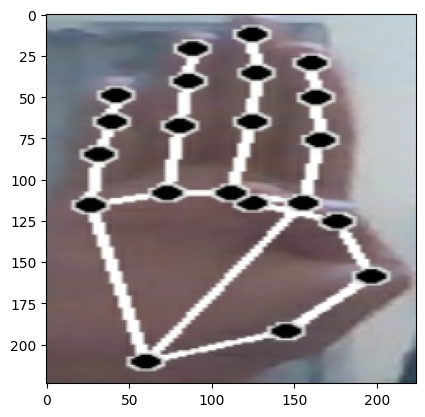

In [14]:
for image, label in images_tf_data_cached.skip(305).take(1):
    print(f"{'Check Train Data'.center(61, '=')}")
    print(f'''    shape-image: {image.shape}
    dtype-image: {image.dtype}
    max-intensity: {tf.reduce_max(image)}
    min-intensity: {tf.reduce_min(image)}

    label: {label}
    label-shape: {label.shape}
    image-type: {label.dtype}'''
    )

    plt.imshow(image, cmap='gray')
plt.show()

In [15]:
images_tf_data_ohe = images_tf_data_cached.map(lambda image, label: one_hot_encode(image, label, NUM_CLASSES))
images_tf_data_ohe_cache = images_tf_data_ohe.cache()

In [16]:
# Print information about the cached dataset and the number of data points
print(f'info data: {images_tf_data_ohe_cache}')
print(f'number of data: {len(images_tf_data_ohe_cache)}')

info data: <CacheDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(26,), dtype=tf.float32, name=None))>
number of data: 5200


=======================Check Train Data======================
    shape-image: (224, 224, 3)
    dtype-image: <dtype: 'float32'>
    max-intensity: 1.0
    min-intensity: 0.0

    one-hot-label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
    label-shape: (26,)
    image-type: <dtype: 'float32'>


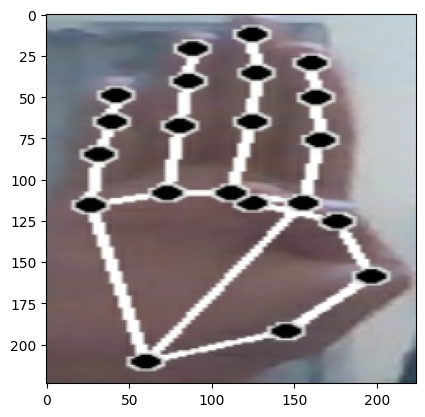

In [17]:
# Menampilkan contoh data yang telah diubah
for image, label in images_tf_data_ohe_cache.skip(305).take(1):
    print(f"{'Check Train Data'.center(61, '=')}")
    print(f'''    shape-image: {image.shape}
    dtype-image: {image.dtype}
    max-intensity: {tf.reduce_max(image)}
    min-intensity: {tf.reduce_min(image)}

    one-hot-label: {label.numpy()}
    label-shape: {label.shape}
    image-type: {label.dtype}'''
    )

    plt.imshow(image, cmap='gray')
plt.show()

In [18]:
# Filter the dataset to get only the data points with NaN values in keypoints
get_nan_images_tf_data_ohe_train_datasets = images_tf_data_ohe_cache.filter(get_nan_in_data)

In [19]:
# Print information about the cached dataset and the number of data points
print(f'info data: {get_nan_images_tf_data_ohe_train_datasets}')
# Display the shape of the image and the keypoints for the first data point with NaN values
for image, keypoint in get_nan_images_tf_data_ohe_train_datasets.take(1):
    print("Image shape:", image.shape)
    print("Keypoints:", keypoint.numpy())

info data: <_FilterDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(26,), dtype=tf.float32, name=None))>


In [ ]:
# Save the concatenated and cached training dataset to a TFRecord file with GZIP compression
# images_tf_data_ohe_cache.save("../Assets/Datasets/SIBI_train_dataset.tfrecord", compression="GZIP")

In [20]:
images_tf_data_ohe_augmented = images_tf_data_ohe_cache.map(augment_image)
images_tf_data_ohe_augmented_cached = images_tf_data_ohe_augmented.cache()

=======================Check Train Data======================
    shape-image: (224, 224, 1)
    dtype-image: <dtype: 'float32'>
    max-intensity: 1.0
    min-intensity: 0.24946841597557068

    one-hot-label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
    label-shape: (26,)
    image-type: <dtype: 'float32'>


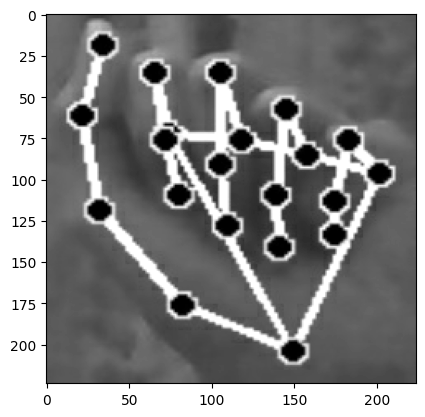

In [21]:
# Menampilkan contoh data yang telah diubah
idx = np.random.randint(400)
for image, label in images_tf_data_ohe_augmented.skip(idx).take(1):
    print(f"{'Check Train Data'.center(61, '=')}")
    print(f'''    shape-image: {image.shape}
    dtype-image: {image.dtype}
    max-intensity: {tf.reduce_max(image)}
    min-intensity: {tf.reduce_min(image)}

    one-hot-label: {label.numpy()}
    label-shape: {label.shape}
    image-type: {label.dtype}'''
    )

    plt.imshow(image, cmap='gray')
plt.show()

In [22]:
new_height=224
new_width=224
label_idx_from_path=5

images_tf_data_test = images_path_tf_data_test.map(
    map_func=lambda image_path: 
        convert_path_to_img_tf_data_test(
            image_path=image_path, 
            target_size=(new_height, new_width),
            is_gray=False,
        ),
    num_parallel_calls=tf.data.AUTOTUNE
)

images_tf_data_test_cached = images_tf_data_test.cache()

In [21]:
print(f'info train data: {images_tf_data_test_cached}')
print(f'number of train data: {len(images_tf_data_test_cached)}')

info train data: <CacheDataset element_spec=TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None)>
number of train data: 390


=======================Check Train Data======================
    shape-image: (224, 224, 3)
    dtype-image: <dtype: 'float32'>
    max-intensity: 1.0
    min-intensity: 0.0


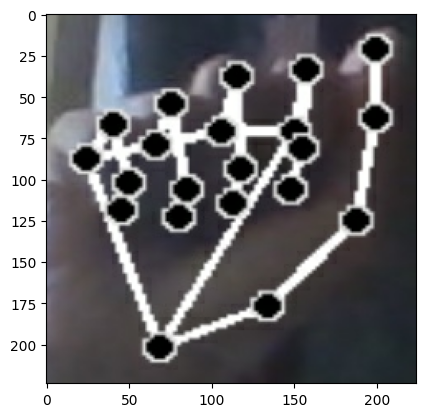

In [23]:
for image in images_tf_data_test_cached.skip(3).take(1):
    print(f"{'Check Train Data'.center(61, '=')}")
    print(f'''    shape-image: {image.shape}
    dtype-image: {image.dtype}
    max-intensity: {tf.reduce_max(image)}
    min-intensity: {tf.reduce_min(image)}'''
    )

    plt.imshow(image, cmap='gray')
plt.show()

In [24]:
# Save the concatenated and cached training dataset to a TFRecord file with GZIP compression
images_tf_data_test_cached.save("../Assets/Datasets/SIBI_test_dataset.tfrecord", compression="GZIP")